# This notebook builds a dog breed image classification model with TensorFlow & Resnet50 CNN architecture

In [1]:
# load the data

import pandas as pd
labels_csv = pd.read_csv('labels.csv')
labels_csv

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever
...,...,...
10217,ffd25009d635cfd16e793503ac5edef0,borzoi
10218,ffd3f636f7f379c51ba3648a9ff8254f,dandie_dinmont
10219,ffe2ca6c940cddfee68fa3cc6c63213f,airedale
10220,ffe5f6d8e2bff356e9482a80a6e29aac,miniature_pinscher


In [2]:
import tensorflow as tf

In [3]:
tf.__version__

'2.3.0'

In [4]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:XLA_CPU:0', device_type='XLA_CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'),
 PhysicalDevice(name='/physical_device:XLA_GPU:0', device_type='XLA_GPU')]

<AxesSubplot:>

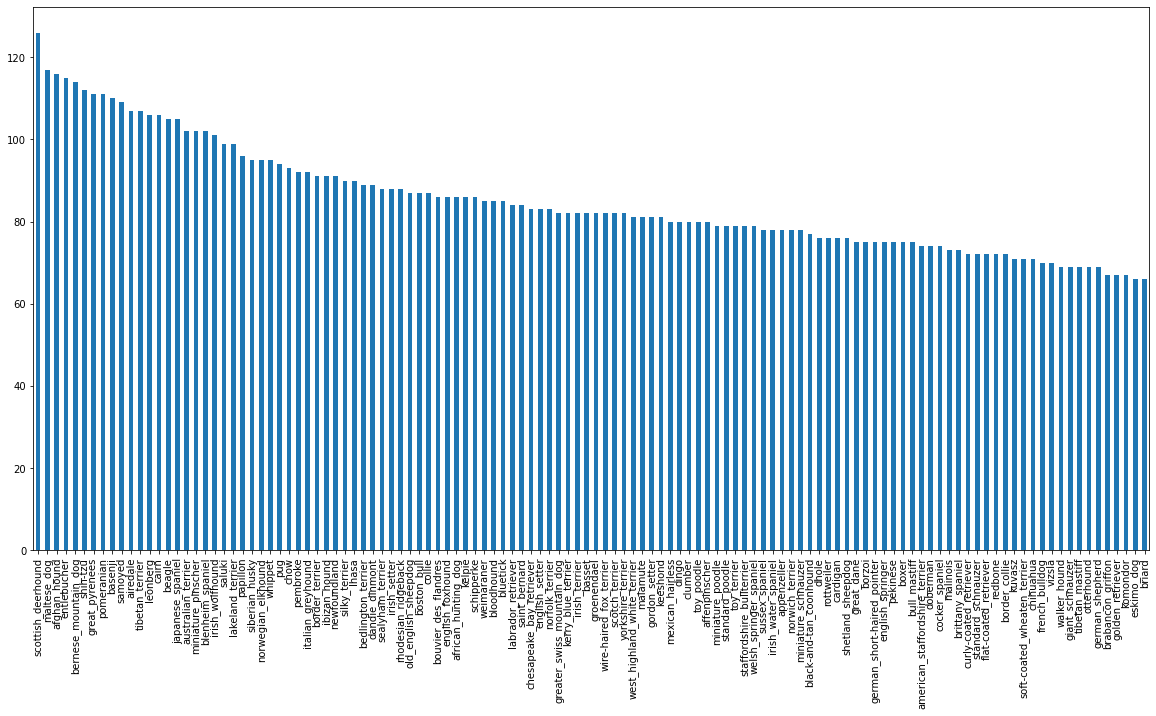

In [5]:
# visualize the data

labels_csv['breed'].value_counts().plot.bar(figsize=(20, 10))

## Getting images & their labels
    Make a list of all the file path names.
    Create the labels

In [6]:
# create path names from image IDs

filenames = ['train/' + fname + '.jpg' for fname in labels_csv['id']]


filenames[:10]

['train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'train/001cdf01b096e06d78e9e5112d419397.jpg',
 'train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'train/002a283a315af96eaea0e28e7163b21b.jpg',
 'train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [7]:
# turn labels into numpy array

import numpy as np
labels = labels_csv['breed'].to_numpy()
labels[:10]

array(['boston_bull', 'dingo', 'pekinese', 'bluetick', 'golden_retriever',
       'bedlington_terrier', 'bedlington_terrier', 'borzoi', 'basenji',
       'scottish_deerhound'], dtype=object)

In [8]:
# find the unique labels

unique_breeds = np.unique(labels)
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [9]:
# turn labels into an array of booleans

boolean_labels = [label == unique_breeds for label in labels]
len(boolean_labels)

10222

In [10]:
# turn booleans into integers

boolean_labels[0].astype(int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [11]:
# creating variables to grab the filenames & boolean_labels

x = filenames
y = boolean_labels

## Create training & validation set for the model
    Take 1000 images first & then increase as needed

In [12]:
# set the number of images

NUM_IMAGES = 1000

In [13]:
# split the data into train & validation set

from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size=0.2,
                                                  random_state=42)

len(x_train), len(x_val), len(y_train), len(y_val)

(800, 200, 800, 200)

## Preprocess the images
    Convert the images into tensors

In [14]:
# create a function to preprocess images

IMG_SIZE = 224


def process_image(img_path, img_size=IMG_SIZE):
    """
    Takes an image path & converts it into a tensor
    """
    image = tf.io.read_file(img_path)
    tensor = tf.io.decode_jpeg(image, channels=3)
    color_channel = tf.image.convert_image_dtype(tensor, tf.float32)
    resized_image = tf.image.resize(color_channel, (img_size, img_size))

    return resized_image

In [15]:
process_image(x[1])

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.22176053, 0.1532646 , 0.12077089],
        [0.24290617, 0.17007563, 0.12532842],
        [0.25025794, 0.16272292, 0.10750583],
        ...,
        [0.4866906 , 0.31810698, 0.18481737],
        [0.46775866, 0.32910115, 0.20204483],
        [0.36027768, 0.2283099 , 0.11981372]],

       [[0.22331059, 0.14479166, 0.10454448],
        [0.20956516, 0.13433544, 0.08120592],
        [0.20576334, 0.11818807, 0.06297097],
        ...,
        [0.34747207, 0.21052358, 0.10098223],
        [0.25428382, 0.14531395, 0.05989731],
        [0.22268865, 0.11715643, 0.03506609]],

       [[0.21673436, 0.12777252, 0.0741048 ],
        [0.20701681, 0.11805496, 0.05878148],
        [0.22288738, 0.12433178, 0.0666433 ],
        ...,
        [0.19956292, 0.10319562, 0.05528758],
        [0.24323113, 0.17113218, 0.12510629],
        [0.17322923, 0.11525137, 0.08183777]],

       ...,

       [[0.71888185, 0.40606675, 0.10109472],
        [0.72

In [15]:
# function to create a tuple of image & label

def data_tuple(image_path, label):
    """
    Takes an image file path & the associated label, process the image & returns a tuple of image & label
    """
    image = process_image(image_path)

    return image, label

## Turn Data into batches of 32

In [16]:
# function to turn data into batches

BATCH_SIZE = 32


def create_data_batches(x, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
    """
    Creates betches of data out of image x & label y pairs.
    Shuffles the data if it's training data but doesn't shuffle if it's validation data.
    Accepts test data as input.
    """
    if test_data:
        data = tf.data.Dataset.from_tensor_slices((tf.constant(x)))
        data_batch = data.map(process_image).batch(batch_size)
        return data_batch
    elif valid_data:
        data = tf.data.Dataset.from_tensor_slices((tf.constant(x),
                                                   tf.constant(y)))
        data_batch = data.map(data_tuple).batch(batch_size)
        return data_batch
    else:
        data = tf.data.Dataset.from_tensor_slices((tf.constant(x),
                                                   tf.constant(y)))
        shuffled_data = data.shuffle(buffer_size=len(x))
        data = data.map(data_tuple)
        data_batch = data.batch(batch_size)

    return data_batch

In [17]:
train_data = create_data_batches(x_train, y_train)
val_data = create_data_batches(x_val, y_val, valid_data=True)

In [18]:
len(train_data)

25

In [19]:
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## Build the model with transfer learning

In [20]:
# shape of the input

INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3]

# shape of the output

OUTPUT_SHAPE = len(unique_breeds)

# setup model from TensorFlow Hub

# MODEL_URL = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4'

MODEL_URL = 'https://tfhub.dev/google/imagenet/resnet_v2_50/classification/4'

In [21]:
# function to build a Keras Model

import tensorflow_hub as hub


def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):

    # setup the model layers
    model = tf.keras.Sequential([
        hub.KerasLayer(MODEL_URL),  # input layer
        tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                              activation='softmax')  # output layer
    ])

    # compile the model
    model.compile(
        loss=tf.keras.losses.CategoricalCrossentropy(),
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
        metrics=['accuracy'])

    # build the model
    model.build(INPUT_SHAPE)

    return model

In [22]:
model = create_model()
model.summary()

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1001)              25615849  
_________________________________________________________________
dense (Dense)                (None, 120)               120240    
Total params: 25,736,089
Trainable params: 120,240
Non-trainable params: 25,615,849
_________________________________________________________________


## Create callbacks

In [23]:
# TensorBoard callback

# load TensorBoard notebook extension

%load_ext tensorboard

In [24]:
import datetime
import os

# function to build TensorBoard callbacks


def create_tensorboard_callback():
    logdir = os.path.join('logs/',
                          datetime.datetime.now().strftime('%Y%m%d-%H%M%S'))
    return tf.keras.callbacks.TensorBoard(logdir)

In [25]:
# create early stopping callback

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                                  patience=3)

## Training the model
    The model is only going to train on 1000 images to make sure everything is working properly.

In [26]:
NUM_EPOCHS = 100

# function to train the model


def train_model():
    """
    Trains a model & returns the trained version
    """
    # create a model
    model = create_model()

    # create TensorBoard callback
    tensorboard = create_tensorboard_callback()

    # fit the model to the data & pass the callbacks
    model.fit(x=train_data,
                epochs=NUM_EPOCHS,
                validation_data=val_data,
                validation_freq=1,
                callbacks=[tensorboard, early_stopping])

    return model

In [27]:
# fit the model to the data

model = train_model()

Epoch 1/100
 1/25 [>.............................] - ETA: 0s - loss: 8.3647 - accuracy: 0.0000e+00WARNING:tensorflow:From C:\Users\Abhik\anaconda3\envs\tf-g\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.


Instructions for updating:
use `tf.profiler.experimental.stop` instead.


25/25 [==============================] - 37s 1s/step - loss: 6.6899 - accuracy: 0.0188 - val_loss: 4.9315 - val_accuracy: 0.0900
Epoch 2/100
25/25 [==============================] - 30s 1s/step - loss: 3.2128 - accuracy: 0.3088 - val_loss: 3.3883 - val_accuracy: 0.2650
Epoch 3/100
25/25 [==============================] - 30s 1s/step - loss: 1.5691 - accuracy: 0.6263 - val_loss: 2.5946 - val_accuracy: 0.3750
Epoch 4/100
25/25 [==============================] - 30s 1s/step - loss: 0.8215 - accuracy: 0.8462 - val_loss: 2.1998 - val_accuracy: 0.4900
Epoch 5/100
25/25 [==============================] - 30s 1s/step - loss: 0.4761 - accuracy: 0.9375 - val_loss: 2.0185 - val_accuracy: 0.5250
Epoch 6/100
25/25 [==============================] - 30s 1s/step - loss: 0.3029 - accuracy: 0.9787 - val_loss: 1.9288 - val_accuracy: 0.5350
Epoch 7/100
25/25 [==============================] - 30s 1s/step - loss: 0.2103 - accuracy: 0.9875 - val_loss: 1.8755 - val_accuracy: 0.5550
Epoch 8/100
25/25 [======

## Make predictions

In [28]:
# make predictions on the validation data

predictions = model.predict(val_data, verbose=1)
predictions

2/7 [=======>......................] - ETA: 2sWARNING:tensorflow:Callbacks method `on_predict_batch_end` is slow compared to the batch time (batch time: 0.0250s vs `on_predict_batch_end` time: 0.9400s). Check your callbacks.


7/7 [==============================] - 6s 862ms/step


array([[2.78569758e-03, 3.45181579e-05, 3.94349036e-06, ...,
        6.83126913e-04, 1.40029599e-03, 8.87450879e-05],
       [5.35748259e-05, 1.39455684e-03, 1.12957321e-03, ...,
        4.23189776e-05, 5.47285927e-05, 2.32293488e-07],
       [2.02127467e-07, 7.98033852e-06, 4.15980276e-06, ...,
        1.65756373e-05, 6.20612036e-06, 1.64677218e-07],
       ...,
       [1.68858591e-07, 7.91360932e-08, 1.83341410e-06, ...,
        1.00876914e-05, 5.87495333e-06, 7.85823147e-07],
       [7.85935117e-05, 3.14217439e-04, 7.21068034e-07, ...,
        1.06280947e-06, 1.54798490e-05, 4.75603063e-03],
       [4.62904223e-04, 5.48112894e-06, 1.03382554e-04, ...,
        1.01892615e-03, 3.36108234e-04, 1.77568421e-04]], dtype=float32)

In [29]:
# turn prediction probabilities into their respective labels

def get_pred_label(prediction_probabilities):
    """
    Turns an array of prediction probabilities into a label
    """
    return unique_breeds[np.argmax(prediction_probabilities)]

In [30]:
len(predictions[0])

120

## Compare predictions with validation labels

In [37]:
# function to unbatch a batch dataset

def unbatch_dataset(data):
    """
    Takes batched dataset of Tensors & returns separate arrays of images & labels
    """

    images_ = []
    labels_ = []
    for image, label in data.unbatch().as_numpy_iterator():
        images_.append(image)
        labels_.append(label)
    
    return images_, labels_

val_images, val_labels = unbatch_dataset(val_data)
val_images[0], val_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.27701408, 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [38]:
get_pred_label(val_labels[0])

'cairn'

In [39]:
get_pred_label(predictions[0])

'komondor'

## Train the model on the full data

In [40]:
# create a data batch with full data

full_data = create_data_batches(x, y)

In [41]:
len(full_data)

320

In [42]:
# create model on full data

full_model = create_model()

In [44]:
# create model callbacks

full_model_tensorboard = create_tensorboard_callback()

full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor='accuracy',
                                                             patience=3)

In [45]:
# fit the model to the full data

full_model.fit(x=full_data,
              epochs=NUM_EPOCHS,
              callbacks=[full_model_tensorboard, full_model_early_stopping])

Epoch 1/100
  2/320 [..............................] - ETA: 57:24 - loss: 7.8881 - accuracy: 0.0000e+00WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.9680s vs `on_train_batch_end` time: 20.6970s). Check your callbacks.


320/320 [==============================] - 333s 1s/step - loss: 2.1144 - accuracy: 0.5207
Epoch 2/100
320/320 [==============================] - 310s 968ms/step - loss: 0.7858 - accuracy: 0.7679
Epoch 3/100
320/320 [==============================] - 310s 968ms/step - loss: 0.5614 - accuracy: 0.8356
Epoch 4/100
320/320 [==============================] - 310s 968ms/step - loss: 0.4268 - accuracy: 0.8802
Epoch 5/100
320/320 [==============================] - 310s 967ms/step - loss: 0.3356 - accuracy: 0.9109
Epoch 6/100
320/320 [==============================] - 310s 967ms/step - loss: 0.2689 - accuracy: 0.9331
Epoch 7/100
320/320 [==============================] - 310s 968ms/step - loss: 0.2187 - accuracy: 0.9506
Epoch 8/100
320/320 [==============================] - 310s 968ms/step - loss: 0.1802 - accuracy: 0.9645
Epoch 9/100
320/320 [==============================] - 310s 967ms/step - loss: 0.1500 - accuracy: 0.9731
Epoch 10/100
320/320 [==============================] - 310s 968ms/ste

In [46]:
pred = full_model.predict(val_data, verbose=1)
pred

2/7 [=======>......................] - ETA: 2sWARNING:tensorflow:Callbacks method `on_predict_batch_end` is slow compared to the batch time (batch time: 0.0230s vs `on_predict_batch_end` time: 0.9430s). Check your callbacks.


7/7 [==============================] - 6s 862ms/step


array([[4.1649031e-08, 1.0698553e-09, 3.1606037e-11, ..., 7.5797686e-07,
        5.7164429e-09, 1.0553501e-09],
       [3.1135871e-13, 3.2353068e-11, 3.2629804e-13, ..., 1.1718688e-15,
        6.8309358e-10, 1.5083530e-11],
       [1.3200825e-16, 7.6892494e-12, 8.2445071e-14, ..., 1.0400706e-13,
        6.3368194e-10, 4.7650220e-15],
       ...,
       [1.9776879e-19, 1.6365320e-17, 8.7026381e-14, ..., 1.9131201e-14,
        4.7235936e-16, 1.4251630e-15],
       [1.1343329e-07, 1.9848680e-12, 4.4215086e-11, ..., 1.5328454e-12,
        7.8910406e-10, 4.4257322e-07],
       [5.8729529e-13, 7.2948852e-13, 2.9725799e-13, ..., 1.8853015e-06,
        4.9983992e-06, 2.6364000e-09]], dtype=float32)

In [47]:
get_pred_label(val_labels[0])

'cairn'

In [48]:
get_pred_label(pred[0])

'cairn'

In [49]:
full_model.input

<tf.Tensor 'keras_layer_2_input:0' shape=(None, 224, 224, 3) dtype=float32>

In [50]:
full_model.output

<tf.Tensor 'dense_2/Softmax:0' shape=(None, 120) dtype=float32>

## Save & load models

In [54]:
# function to save a model

def save_model(model, suffix=None):
    modeldir = os.path.join('models/',
                           datetime.datetime.now().strftime('%Y%m%d-%H%M%S'))
    model_path = modeldir + '-' + suffix + '.h5'
    model.save(model_path)
    return model_path

In [55]:
# function to load model

def load_model(model_path):
    model = tf.keras.models.load_model(model_path,
                                      custom_objects={'KerasLayer':hub.KerasLayer})
    return model

In [56]:
save_model(full_model, suffix='full-data-resnet50v2')

'models/20210325-210504-full-data-resnet50v2.h5'

## Implement image augmentation on training data

In [33]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

In [34]:
datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='reflect')

In [35]:
# function to get images from directory

from PIL import Image
from skimage import io

def get_images(img_path):
    directory = img_path
    size = IMG_SIZE
    dataset = []
    my_images = os.listdir(directory)
    for i, image_name in enumerate(my_images):
        if image_name.split('.')[1]=='jpg':
            image = io.imread(directory + image_name)
            image = Image.fromarray(image, 'RGB')
            image = image.resize((size, size))
            dataset.append(np.array(image))

    return np.array(dataset)

## Load previously trained model & retrain it

In [29]:
# load previously trained model

augment_data_model = load_model('models/20210325-210504-full-data-resnet50v2.h5')

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [30]:
augment_data_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_4 (KerasLayer)   (None, 1001)              25615849  
_________________________________________________________________
dense_5 (Dense)              (None, 120)               120240    
Total params: 25,736,089
Trainable params: 120,240
Non-trainable params: 25,615,849
_________________________________________________________________


In [38]:
# create model callback

augment_data_model_tensorboard = create_tensorboard_callback()
augment_data_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor='accuracy',
                                                                     patience=3)

In [39]:
# load the data from directory

augmented_data = tf.constant(get_images('train/'))
augmented_data

<tf.Tensor: shape=(10222, 224, 224, 3), dtype=uint8, numpy=
array([[[[153,  92,  44],
         [166, 110,  59],
         [162, 115,  60],
         ...,
         [211, 187,  67],
         [184, 154,  67],
         [187, 154,  82]],

        [[166, 112,  71],
         [150, 102,  58],
         [157, 117,  69],
         ...,
         [234, 207, 101],
         [213, 183,  88],
         [193, 160,  74]],

        [[119,  76,  43],
         [115,  75,  40],
         [197, 162, 123],
         ...,
         [225, 193, 107],
         [228, 195,  93],
         [213, 179,  76]],

        ...,

        [[187, 120,  68],
         [183, 116,  64],
         [189, 123,  71],
         ...,
         [183, 130,  84],
         [231, 178, 128],
         [220, 166, 118]],

        [[187, 120,  67],
         [184, 117,  65],
         [190, 124,  72],
         ...,
         [156,  95,  57],
         [210, 156, 104],
         [211, 158, 105]],

        [[182, 115,  62],
         [186, 119,  66],
         [190,

In [48]:
len(augmented_data)//BATCH_SIZE

319

## Train the model with augmented data

In [49]:
# train the model with augmented data

train_generator = datagen.flow(augmented_data, y,
                               batch_size=BATCH_SIZE)

augment_data_model.fit_generator(train_generator,
                                 steps_per_epoch=len(
                                     augmented_data)//BATCH_SIZE,
                                 epochs=NUM_EPOCHS,
                                 callbacks=[augment_data_model_tensorboard,
                                            augment_data_model_early_stopping])

Instructions for updating:
Please use Model.fit, which supports generators.


Instructions for updating:
Please use Model.fit, which supports generators.


Epoch 1/100
  1/319 [..............................] - ETA: 0s - loss: 2.7377 - accuracy: 0.6875WARNING:tensorflow:From C:\Users\Abhik\anaconda3\envs\tf-g\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.


Instructions for updating:
use `tf.profiler.experimental.stop` instead.


319/319 [==============================] - 696s 2s/step - loss: 2.2142 - accuracy: 0.6678
Epoch 2/100
319/319 [==============================] - 366s 1s/step - loss: 1.6151 - accuracy: 0.7187
Epoch 3/100
319/319 [==============================] - 465s 1s/step - loss: 1.4221 - accuracy: 0.7384
Epoch 4/100
319/319 [==============================] - 418s 1s/step - loss: 1.2394 - accuracy: 0.7568
Epoch 5/100
319/319 [==============================] - 437s 1s/step - loss: 1.0585 - accuracy: 0.7716
Epoch 6/100
319/319 [==============================] - 389s 1s/step - loss: 1.0494 - accuracy: 0.7759
Epoch 7/100
319/319 [==============================] - 414s 1s/step - loss: 1.0336 - accuracy: 0.7764
Epoch 8/100
319/319 [==============================] - 429s 1s/step - loss: 1.0002 - accuracy: 0.7797
Epoch 9/100
319/319 [==============================] - 393s 1s/step - loss: 0.9116 - accuracy: 0.7910
Epoch 10/100
319/319 [==============================] - 445s 1s/step - loss: 0.9070 - accuracy

In [70]:
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 2000), started 0:00:56 ago. (Use '!kill 2000' to kill it.)

In [86]:
# make predictions on validation data

prediction = augment_data_model.predict(val_data, verbose=1)
prediction

2/7 [=======>......................] - ETA: 2sWARNING:tensorflow:Callbacks method `on_predict_batch_end` is slow compared to the batch time (batch time: 0.0230s vs `on_predict_batch_end` time: 0.9419s). Check your callbacks.


7/7 [==============================] - 6s 865ms/step


array([[8.63403349e-10, 2.60794969e-10, 4.58537331e-12, ...,
        2.05163471e-03, 2.61102969e-07, 1.84438173e-10],
       [1.86092361e-17, 1.52278898e-10, 3.85160783e-12, ...,
        3.20446699e-16, 1.11969967e-09, 1.69679971e-13],
       [2.59664660e-19, 2.73589988e-17, 3.97518316e-19, ...,
        2.71558233e-17, 2.87703820e-16, 2.79724400e-18],
       ...,
       [7.09834397e-23, 9.55486795e-20, 7.63834491e-21, ...,
        2.16753994e-17, 3.13610149e-19, 1.49079154e-15],
       [1.07404233e-12, 9.18259185e-15, 3.81512794e-10, ...,
        7.85617076e-16, 2.64440803e-09, 8.71688599e-07],
       [1.34097445e-14, 5.05051492e-14, 1.11089602e-16, ...,
        3.01659639e-07, 8.41932912e-10, 7.75822375e-12]], dtype=float32)

In [90]:
get_pred_label(val_labels[0])

'cairn'

In [91]:
get_pred_label(prediction[0])

'cairn'

## Find the accuracy of the model

In [52]:
from sklearn.metrics import accuracy_score

In [53]:
augment_model_accuracy = accuracy_score(np.argmax(val_labels, axis=1), pred.argmax(axis=1))
print(f'Accuracy is {augment_model_accuracy*100}%')

Accuracy is 99.0%


In [69]:
# save the model

save_model(augment_data_model, suffix='augmented-data-resnet50v2')

'models/20210309-145839-augmented-data-resnet50v2.h5'

## Predict on custom images

In [58]:
custom_path = 'custom-images/'
custom_image_path = [custom_path + fname for fname in os.listdir(custom_path)]
custom_image_path

['custom-images/Red_Smooth_Saluki.jpg',
 'custom-images/rhodesian-ridgeback-card-small.jpg',
 'custom-images/rottweiler.jfif',
 'custom-images/toy-poodle-ap-vul2oi.jpg']

In [59]:
custom_image_data = create_data_batches(custom_image_path, test_data=True)
custom_image_data

<BatchDataset shapes: (None, 224, 224, 3), types: tf.float32>

In [60]:
custom_image_pred = full_model.predict(custom_image_data, verbose=1)
custom_image_pred

1/1 [==============================] - 0s 5ms/step


array([[3.91701577e-15, 6.43372218e-08, 4.40059413e-11, 2.63174980e-13,
        5.57924928e-10, 1.33331755e-08, 3.34844300e-17, 2.68018624e-07,
        8.13212412e-14, 2.60779203e-08, 4.12892263e-08, 1.33560058e-12,
        1.18974717e-11, 4.29270741e-14, 7.76427422e-10, 1.05259002e-09,
        3.85444281e-11, 2.05787514e-12, 2.73840328e-06, 4.92186500e-11,
        6.66067090e-10, 5.89039494e-12, 1.50487105e-11, 2.18600762e-10,
        7.79976361e-10, 3.66167707e-10, 1.44140005e-10, 2.06231313e-14,
        2.73794182e-11, 2.81135254e-10, 3.26134710e-16, 4.95697979e-14,
        2.28492045e-10, 1.36887168e-10, 1.35684290e-08, 7.60894874e-13,
        1.47180618e-11, 5.73334148e-07, 1.87028622e-11, 4.46697522e-05,
        5.27731572e-05, 6.80917887e-13, 7.81697623e-11, 7.89839028e-10,
        5.08786735e-10, 1.24723918e-15, 4.69444531e-14, 6.86714401e-12,
        4.06987860e-10, 2.20805504e-07, 7.80433394e-17, 5.75771628e-06,
        3.24290483e-09, 4.38100131e-13, 2.38887008e-13, 6.992597

In [61]:
custom_pred_labels = [get_pred_label(custom_image_pred[i]) for i in range(len(custom_image_pred))]
custom_pred_labels

['whippet', 'rhodesian_ridgeback', 'rottweiler', 'toy_poodle']

## Load model and make it ready to be served on tensorflow serving

In [62]:
tfs_model = load_model('models/20210325-210504-full-data-resnet50v2.h5')
tfs_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_2 (KerasLayer)   (None, 1001)              25615849  
_________________________________________________________________
dense_2 (Dense)              (None, 120)               120240    
Total params: 25,736,089
Trainable params: 120,240
Non-trainable params: 25,615,849
_________________________________________________________________


In [65]:
import shutil


def save_model_for_serving(model, version):
    model_name = 'full-data-resnet50v2'
    model_version = version

    export_path = os.path.join(
        tf.compat.as_bytes('models/export/{}'.format(model_name)),
        tf.compat.as_bytes(str(model_version)))

    if os.path.isdir(export_path):
        shutil.rmtree(export_path)

    tf.keras.models.save_model(
        model,
        export_path,
        overwrite=True,
        include_optimizer=True,
        save_format=None,
        signatures=None,
        options=None)

In [66]:
save_model_for_serving(tfs_model, 1)

INFO:tensorflow:Assets written to: models/export/full-data-resnet50v2\1\assets


INFO:tensorflow:Assets written to: models/export/full-data-resnet50v2\1\assets
